In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SA 
import time 

# Global Search : Simulated Annealing

    Simle metaheuristic algorithm that finde global minimum/maximum.
    A metaheuristic similar to gradient descent.
    
    1º Select randomly a point for a function to minimize.
    2º Select the range (Envirnoment) in which will decide next point to move.
    3º Select randomly a point inside the range of the initial point.
        If it is a better solution, use this one as the initial solution.
        Elsewere with a probability p = exp(-(f(a)-f(b))/Ti) decide if use this new solution or keep the previous one.
               f(a) : The objective function applied to the new point
               f(b) : The objective function applied to the previous point.
               Ti : Temperature in the current moment.
    4º Update the temperature and back to the 3th point. (t <- t/(1+B*t); B=(t_start - t_final)/(K_steps*t_start*t_finalize)  )

In [17]:
def gradualTimmeUpdate(T_initial, T_final, K_steps, T_current):
    Betta = (T_initial - T_final*1.0) / (K_steps*1.0* T_initial * T_final)
    return T_current*1.0/(1.0 + Betta*T_current)

#Simulated Annealing Continuous
def SAC(MAX_ITERATIONS, InitialPoint, EnvirnomentRange, InitialTemperature, objectiveFunction, timeUpdateFunction, restrictions=[None,None]
        ,probabilityFunction=None, randomFunction=np.random.rand, debug=False, verbose=False, plotose=False ):
    if probabilityFunction == None : probabilityFunction=lambda a,b,T : np.exp(-(objectiveFunction(a) - objectiveFunction(b))/T)
    CurrentTempreature = InitialTemperature
    Current_solution = [InitialPoint , objectiveFunction(InitialPoint)]
    Best_Solution = [InitialPoint , objectiveFunction(InitialPoint)]
    if plotose :
        Acumulative_values = [Best_Solution[-1]]
    InitialTime = time.time()
    for i in xrange(MAX_ITERATIONS):
        StepTime = time.time()
        while True:
            RandomPoint = (randomFunction(len(Current_solution[0])) - 0.5) * 2
            New_solution = Current_solution[0] + RandomPoint*EnvirnomentRange 
            #print New_solution
            if restrictions[0] == None or restrictions[0] <= New_solution:
                if restrictions[1] == None or restrictions[1] >= New_solution:
                    break
        New_value = objectiveFunction(New_solution)
        if debug: print "Sol ",i,":",New_solution,New_value, " <-> ",Current_solution[0],Current_solution[1]
        if New_value < Current_solution[1] : 
            Current_solution[0] = New_solution
            Current_solution[1] = New_value
        else:
            ExpectedProbility = min([1,probabilityFunction(Current_solution[1],New_value,CurrentTempreature)])
            ObtainedProbability = np.random.rand()
            if debug : print "Exp : ",ExpectedProbility,ObtainedProbability
            if ObtainedProbability <= ExpectedProbility:
                if Best_Solution[1] > Current_solution[1]:
                    Best_Solution[0] = Current_solution[0]
                    Best_Solution[1] = Current_solution[1]
                Current_solution[0] = New_solution
                Current_solution[1] = New_value
        
        #print "Current Temp",CurrentTempreature
        CurrentTempreature = timeUpdateFunction(i,CurrentTempreature)
        if plotose :
            Acumulative_values.append(Best_Solution[-1])
        if verbose == 1:  
            print "Step : ",i," Duration:",(time.time() - StepTime) , "Temperature:",CurrentTempreature," Solution: ",Current_solution[1]," Best solution: ",Best_Solution[1]
    if plotose :
            plt.plot(Acumulative_values)
            plt.title("Best" + str(Best_Solution[1]))
            plt.show()
    if verbose > 0:
        TotalTime = (time.time()-InitialTime)
        print "Total time:" ,TotalTime, " Time per step", TotalTime*1.0/MAX_ITERATIONS, "Best solution : ",Best_Solution[1]
    return Best_Solution

def SAC_GTU(MAX_ITERATIONS, InitialPoint, EnvirnomentRange,  InitialTemperature, FinalTemperature,objectiveFunction, restrictions=[None,None], debug=False, verbose=False, plotose=False):
    return SAC(MAX_ITERATIONS, InitialPoint, EnvirnomentRange, InitialTemperature, objectiveFunction=objectiveFunction,restrictions=restrictions, timeUpdateFunction=lambda i,T : gradualTimmeUpdate(InitialTemperature,FinalTemperature,MAX_ITERATIONS,T), debug=debug, verbose=verbose, plotose=plotose)

In [12]:
#SAC(100,np.asanyarray([10.0]),1.0,15.0,fo,lambda i,T : gradualTimmeUpdate(15.0,1.0,100,T))
def test1():
    def fo(x): return np.cos(x)/x
    np.random.seed(1)
    R = SAC_GTU(1000,np.asanyarray([10.0]),5.0,100.0,1.0,fo, restrictions=[0,30], plotose=False,verbose=False)
    print R
    print "Test result : ",(int(R[1][0]*10000) == -3364) and (int(R[0][0]*10000) == 28166)
    
    

In [19]:
#R = test1()
SAC_GTU(100,np.asanyarray([10.0]),5.0,100.0,1.0,fo, restrictions=[0,30], plotose=False,verbose=True)

Step :  0  Duration: 0.0 Temperature: 50.2512562814  Solution:  [-0.05675213]  Best solution:  [-0.08390715]
Step :  1  Duration: 0.0 Temperature: 33.5570469799  Solution:  [ 0.16079354]  Best solution:  [-0.08390715]
Step :  2  Duration: 0.0 Temperature: 25.1889168766  Solution:  [-0.00303147]  Best solution:  [-0.08390715]
Step :  3  Duration: 0.0 Temperature: 20.1612903226  Solution:  [-0.09953604]  Best solution:  [-0.08390715]
Step :  4  Duration: 0.0 Temperature: 16.8067226891  Solution:  [ 0.05232591]  Best solution:  [-0.09953604]
Step :  5  Duration: 0.0 Temperature: 14.409221902  Solution:  [-0.04902061]  Best solution:  [-0.09953604]
Step :  6  Duration: 0.0 Temperature: 12.6103404792  Solution:  [ 0.03669638]  Best solution:  [-0.09953604]
Step :  7  Duration: 0.0 Temperature: 11.2107623318  Solution:  [-0.03451065]  Best solution:  [-0.09953604]
Step :  8  Duration: 0.0 Temperature: 10.0908173562  Solution:  [-0.03451065]  Best solution:  [-0.09953604]
Step :  9  Duration:

[array([ 2.64847986]), array([-0.33259216])]

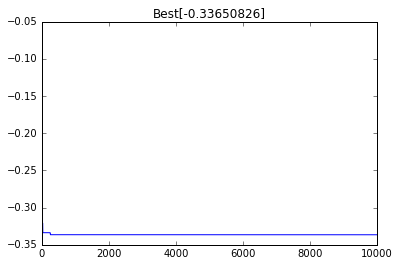

Total time: 0.244999885559  Time per step 2.44999885559e-05 Best solution :  [-0.33650826]


[array([ 2.79742399]), array([-0.33650826])]

In [3]:
def fo(x): return np.cos(x)/x
SA.SAC_GTU(10000,np.asanyarray([10.0]),5.0,100.0,1.0,fo, restrictions=[0,30], plotose=True,verbose=2)